In [3]:
#Importing Libraries
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

C:\Users\SANDHYA\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
#Reading the dataset

iris=pd.read_csv("D:\\Spark Foundation\\Iris data\\Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.shape

(150, 6)

In [8]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
#Check for null values

missing_iris=iris.isnull().sum()
missing_iris

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#Therefore, no missing values present in the data

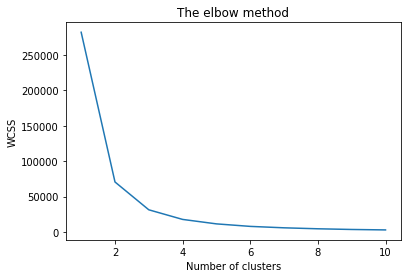

In [17]:
#Finding the optimum number of clusters using K-means clustering

x = iris.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, \
                    n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    #print(wcss)
    #print(kmeans.precompute_distances)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

#From the above "Elbow plot" graph, it is clear that the optimum number of clusters will be "3". This is evident from the fact that the elbow occurs steeply at 3 & within cluster sum of squares (wcss) doesn't decrease significantly.

In [19]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [20]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
kmeans.cluster_centers_

array([[ 25.5  ,   5.006,   3.418,   1.464],
       [125.5  ,   6.588,   2.974,   5.552],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

In [23]:
kmeans.cluster_centers_[:,1]

array([5.006, 6.588, 5.936])

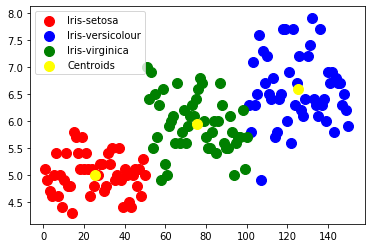

In [25]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [26]:
#Hierarchial Clustering

from scipy.cluster.hierarchy import dendrogram, linkage

In [27]:
x

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

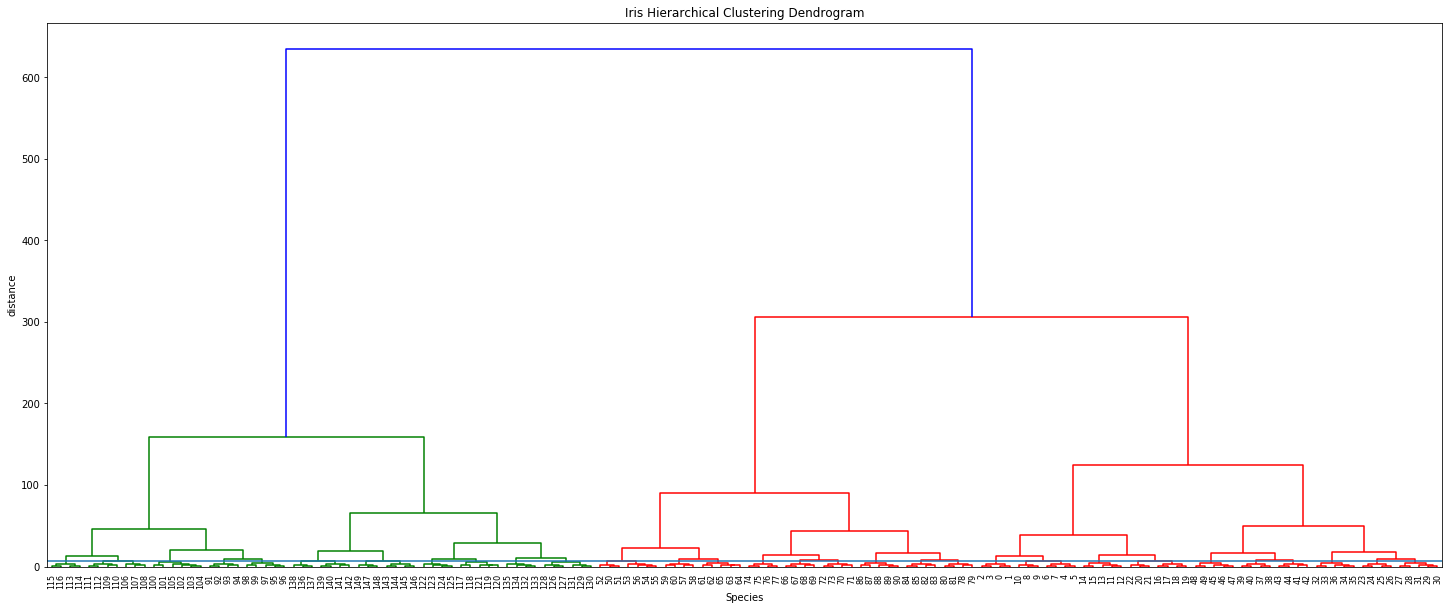

In [28]:
# calculate full dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(x, 'ward')

# set cut-off to 150
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d)
plt.show()